In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_segment_train = pd.read_csv('Customer_segmentation_train.csv')
customer_segment_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
customer_segment_test = pd.read_csv('Customer_segmentation_test.csv')
customer_segment_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
customer_segment_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
customer_segment_train.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
customer_segment_train.isna().sum(axis=0)/len(customer_segment_train['ID'])

ID                 0.000000
Gender             0.000000
Ever_Married       0.017353
Age                0.000000
Graduated          0.009668
Profession         0.015369
Work_Experience    0.102752
Spending_Score     0.000000
Family_Size        0.041522
Var_1              0.009420
Segmentation       0.000000
dtype: float64

In [ ]:
# customer_segment_train[customer_segment_train['Ever_Married'].isna()==True]

In [ ]:
# customer_segment_train[customer_segment_train['Graduated'].isna()==True]

In [ ]:
# customer_segment_train[customer_segment_train['Profession'].isna()==True]

In [ ]:
# customer_segment_train[customer_segment_train['Work_Experience'].isna()==True]

In [ ]:
# customer_segment_train[customer_segment_train['Family_Size'].isna()==True]

In [ ]:
# customer_segment_train[customer_segment_train['Var_1'].isna()==True]

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

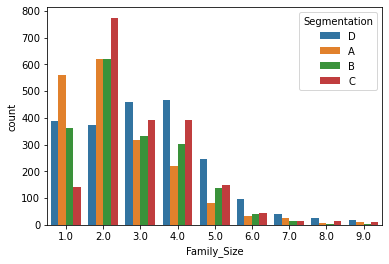

In [7]:
sns.countplot(data = customer_segment_train,x = 'Family_Size', hue = 'Segmentation')

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

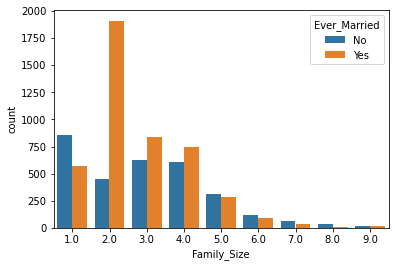

In [8]:
sns.countplot(data = customer_segment_train,x = 'Family_Size', hue = 'Ever_Married')

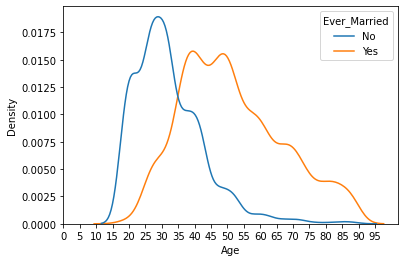

In [9]:
sns.kdeplot(data = customer_segment_train,x = 'Age', hue = 'Ever_Married')
plt.xticks(np.arange(0,100,5));

In [10]:
# customer_segment_train[(customer_segment_train['Ever_Married']=='Yes')& (customer_segment_train['Age']>=40 )]

In [ ]:
230/1647 # 28

In [ ]:
325/2026 # 30

In [ ]:
274/1830 #29

In [ ]:
73/998 # 25

In [10]:
len(customer_segment_train[(customer_segment_train['Age']>30)&(customer_segment_train['Age']<40)&(customer_segment_train['Ever_Married'].isna()==True)]['ID'])

27

In [ ]:
# I am going to put all ages <=30 as not married, >=40as married and drop 30<age<40(27 entries)

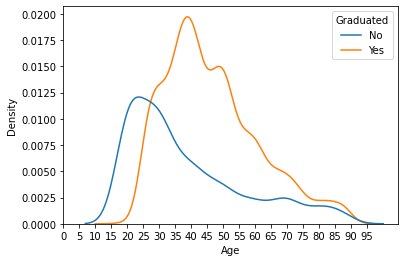

In [10]:
sns.kdeplot(data = customer_segment_train,x = 'Age', hue = 'Graduated')
plt.xticks(np.arange(0,100,5));

In [ ]:
# <=25 most probably not graduated, >=35 graduated and 25<age<35=>drop(11)


In [11]:
customer_segment_train[(customer_segment_train['Graduated']=='No')&(customer_segment_train['Age']>=35 )]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
13,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A
14,460849,Female,Yes,58,No,Doctor,0.0,Low,1.0,Cat_3,B
15,460563,Female,No,41,No,Healthcare,1.0,Low,2.0,Cat_1,C
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,B
...,...,...,...,...,...,...,...,...,...,...,...
8049,461292,Female,Yes,81,No,Lawyer,NaN,High,2.0,Cat_3,D
8051,464853,Male,Yes,39,No,Executive,8.0,Average,4.0,Cat_4,A
8057,466460,Male,Yes,85,No,Lawyer,1.0,Low,1.0,Cat_6,D
8061,465231,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C


In [13]:
len(customer_segment_train[(customer_segment_train['Age']>25)&(customer_segment_train['Age']<35)&(customer_segment_train['Graduated'].isna()==True)]['ID'])

11

In [12]:
customer_segment_train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [13]:
customer_segment_train[(customer_segment_train['Profession'].isna()==True) & (customer_segment_train['Graduated']=='No')]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
118,465827,Male,No,27,No,NaN,2.0,Low,7.0,Cat_4,D
437,461410,Male,Yes,79,No,NaN,0.0,Average,2.0,NaN,C
440,460532,Female,No,18,No,NaN,0.0,Low,6.0,Cat_6,D
498,459656,Male,No,22,No,NaN,NaN,Low,6.0,Cat_1,D
545,466009,Female,No,32,No,NaN,10.0,Low,5.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
7717,462628,Female,Yes,28,No,NaN,NaN,Average,3.0,Cat_4,D
7870,462301,Female,No,27,No,NaN,12.0,Low,3.0,Cat_6,D
7899,464548,Female,Yes,47,No,NaN,1.0,Low,1.0,Cat_4,A
7935,464977,Female,Yes,66,No,NaN,1.0,Average,2.0,Cat_4,B


<AxesSubplot:xlabel='Age', ylabel='Work_Experience'>

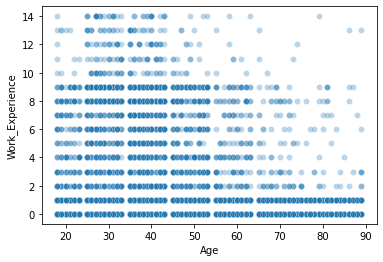

In [14]:
sns.scatterplot(data = customer_segment_train,  x= 'Age', y='Work_Experience',alpha=0.3)

In [18]:
# Delete var_1 missing values, Delete Family size missing values, Put missing values of Profession as none, Delete Work Experience missing values

In [15]:
Modified_train = customer_segment_train.dropna(axis=0,subset=['Var_1','Work_Experience','Family_Size'])

In [16]:
Modified_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6913 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6913 non-null   int64  
 1   Gender           6913 non-null   object 
 2   Ever_Married     6806 non-null   object 
 3   Age              6913 non-null   int64  
 4   Graduated        6853 non-null   object 
 5   Profession       6824 non-null   object 
 6   Work_Experience  6913 non-null   float64
 7   Spending_Score   6913 non-null   object 
 8   Family_Size      6913 non-null   float64
 9   Var_1            6913 non-null   object 
 10  Segmentation     6913 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 648.1+ KB


In [17]:
Modified_train['Profession'] = Modified_train['Profession'].fillna('None')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\730613302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_train['Profession'] = Modified_train['Profession'].fillna('None')


In [22]:
# Modified_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6913 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6913 non-null   int64  
 1   Gender           6913 non-null   object 
 2   Ever_Married     6806 non-null   object 
 3   Age              6913 non-null   int64  
 4   Graduated        6853 non-null   object 
 5   Profession       6913 non-null   object 
 6   Work_Experience  6913 non-null   float64
 7   Spending_Score   6913 non-null   object 
 8   Family_Size      6913 non-null   float64
 9   Var_1            6913 non-null   object 
 10  Segmentation     6913 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 648.1+ KB


In [18]:
Modified_train[Modified_train['Age']<=30]['Ever_Married'] = Modified_train[Modified_train['Age']<=30]['Ever_Married'].fillna('No')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\1357848846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_train[Modified_train['Age']<=30]['Ever_Married'] = Modified_train[Modified_train['Age']<=30]['Ever_Married'].fillna('No')


In [19]:
Modified_train[Modified_train['Age']>=40]['Ever_Married'] = Modified_train[Modified_train['Age']>=40]['Ever_Married'].fillna('Yes')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\395103786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_train[Modified_train['Age']>=40]['Ever_Married'] = Modified_train[Modified_train['Age']>=40]['Ever_Married'].fillna('Yes')


In [20]:
Modified_train = Modified_train.dropna(axis=0,subset=['Ever_Married'])

In [ ]:
# Modified_train.info()

In [21]:
Modified_train[Modified_train['Age']<=25]['Graduated'] = Modified_train[Modified_train['Age']<=25]['Graduated'].fillna('No')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\4264010769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_train[Modified_train['Age']<=25]['Graduated'] = Modified_train[Modified_train['Age']<=25]['Graduated'].fillna('No')


In [22]:
Modified_train[Modified_train['Age']>=35]['Graduated'] = Modified_train[Modified_train['Age']>=35]['Graduated'].fillna('Yes')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\2017856501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_train[Modified_train['Age']>=35]['Graduated'] = Modified_train[Modified_train['Age']>=35]['Graduated'].fillna('Yes')


In [23]:
Modified_train = Modified_train.dropna(axis=0,subset=['Graduated'])

In [24]:
Modified_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6749 non-null   int64  
 1   Gender           6749 non-null   object 
 2   Ever_Married     6749 non-null   object 
 3   Age              6749 non-null   int64  
 4   Graduated        6749 non-null   object 
 5   Profession       6749 non-null   object 
 6   Work_Experience  6749 non-null   float64
 7   Spending_Score   6749 non-null   object 
 8   Family_Size      6749 non-null   float64
 9   Var_1            6749 non-null   object 
 10  Segmentation     6749 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 632.7+ KB


In [25]:
customer_segment_test.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [26]:
customer_segment_test.isna().sum(axis=0)/len(customer_segment_test['ID'])

ID                 0.000000
Gender             0.000000
Ever_Married       0.019033
Age                0.000000
Graduated          0.009136
Profession         0.014465
Work_Experience    0.102398
Spending_Score     0.000000
Family_Size        0.043015
Var_1              0.012181
dtype: float64

In [27]:
Modified_test = customer_segment_test.dropna(axis=0,subset=['Var_1','Work_Experience','Family_Size'])

In [ ]:
# Modified_test.info()

In [28]:
Modified_test['Profession'] = Modified_test['Profession'].fillna('None')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\217367325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_test['Profession'] = Modified_test['Profession'].fillna('None')


In [29]:
Modified_test[Modified_test['Age']<=30]['Ever_Married'] = Modified_test[Modified_test['Age']<=30]['Ever_Married'].fillna('No')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\155289367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_test[Modified_test['Age']<=30]['Ever_Married'] = Modified_test[Modified_test['Age']<=30]['Ever_Married'].fillna('No')


In [30]:
Modified_test[Modified_test['Age']>=40]['Ever_Married'] = Modified_test[Modified_test['Age']>=40]['Ever_Married'].fillna('Yes')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\211081756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_test[Modified_test['Age']>=40]['Ever_Married'] = Modified_test[Modified_test['Age']>=40]['Ever_Married'].fillna('Yes')


In [31]:
Modified_test = Modified_test.dropna(axis=0,subset=['Ever_Married'])

In [32]:
Modified_test[Modified_test['Age']<=25]['Graduated'] = Modified_test[Modified_test['Age']<=25]['Graduated'].fillna('No')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\824871520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_test[Modified_test['Age']<=25]['Graduated'] = Modified_test[Modified_test['Age']<=25]['Graduated'].fillna('No')


In [33]:
Modified_test[Modified_test['Age']>=35]['Graduated'] = Modified_test[Modified_test['Age']>=35]['Graduated'].fillna('Yes')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16424\2554997953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_test[Modified_test['Age']>=35]['Graduated'] = Modified_test[Modified_test['Age']>=35]['Graduated'].fillna('Yes')


In [34]:
Modified_test = Modified_test.dropna(axis=0,subset=['Graduated'])

In [35]:
Modified_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2183 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2183 non-null   int64  
 1   Gender           2183 non-null   object 
 2   Ever_Married     2183 non-null   object 
 3   Age              2183 non-null   int64  
 4   Graduated        2183 non-null   object 
 5   Profession       2183 non-null   object 
 6   Work_Experience  2183 non-null   float64
 7   Spending_Score   2183 non-null   object 
 8   Family_Size      2183 non-null   float64
 9   Var_1            2183 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 187.6+ KB


In [36]:
Modified_train['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [42]:
# Spending score - Low = 1 Average = 2 High = 3
# Dummy for gender,married,graduated,profession,var1
# Drop ID

In [37]:
Modified_train.loc[Modified_train['Spending_Score'] =='Low', 'Spending_Score'] = 1

In [38]:
Modified_train.loc[Modified_train['Spending_Score'] =='Average', 'Spending_Score'] = 2

In [39]:
Modified_train.loc[Modified_train['Spending_Score'] =='High', 'Spending_Score'] = 3

In [40]:
Modified_train['Spending_Score'] = Modified_train['Spending_Score'].transform(lambda value:int(value))

In [41]:
Modified_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6749 non-null   int64  
 1   Gender           6749 non-null   object 
 2   Ever_Married     6749 non-null   object 
 3   Age              6749 non-null   int64  
 4   Graduated        6749 non-null   object 
 5   Profession       6749 non-null   object 
 6   Work_Experience  6749 non-null   float64
 7   Spending_Score   6749 non-null   int64  
 8   Family_Size      6749 non-null   float64
 9   Var_1            6749 non-null   object 
 10  Segmentation     6749 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 632.7+ KB


In [42]:
Modified_train['Spending_Score'].unique()

array([1, 3, 2], dtype=int64)

In [43]:
Modified_test.loc[Modified_test['Spending_Score'] =='Low', 'Spending_Score'] = 1

In [44]:
Modified_test.loc[Modified_test['Spending_Score'] =='Average', 'Spending_Score'] = 2

In [45]:
Modified_test.loc[Modified_test['Spending_Score'] =='High', 'Spending_Score'] = 3

In [46]:
Modified_test['Spending_Score'] = Modified_test['Spending_Score'].transform(lambda value:int(value))

In [47]:
Modified_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2183 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2183 non-null   int64  
 1   Gender           2183 non-null   object 
 2   Ever_Married     2183 non-null   object 
 3   Age              2183 non-null   int64  
 4   Graduated        2183 non-null   object 
 5   Profession       2183 non-null   object 
 6   Work_Experience  2183 non-null   float64
 7   Spending_Score   2183 non-null   int64  
 8   Family_Size      2183 non-null   float64
 9   Var_1            2183 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 187.6+ KB


In [48]:
Modified_train = Modified_train.drop('ID',axis=1)

In [49]:
Modified_test = Modified_test.drop('ID',axis=1)

In [50]:
Modified_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6749 non-null   object 
 1   Ever_Married     6749 non-null   object 
 2   Age              6749 non-null   int64  
 3   Graduated        6749 non-null   object 
 4   Profession       6749 non-null   object 
 5   Work_Experience  6749 non-null   float64
 6   Spending_Score   6749 non-null   int64  
 7   Family_Size      6749 non-null   float64
 8   Var_1            6749 non-null   object 
 9   Segmentation     6749 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 580.0+ KB


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

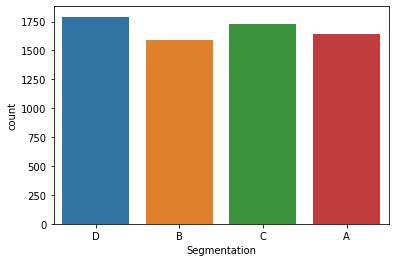

In [53]:
sns.countplot(data = Modified_train,x='Segmentation')

In [51]:
Modified_train['Segmentation'].value_counts()

D    1792
C    1730
A    1639
B    1588
Name: Segmentation, dtype: int64

In [52]:
Modified_train_dummies = Modified_train.drop(['Age','Work_Experience','Spending_Score','Family_Size','Segmentation'],axis=1)
Modified_train_notdummies = Modified_train[['Age','Work_Experience','Spending_Score','Family_Size','Segmentation']]

In [53]:
Modified_test_dummies = Modified_test.drop(['Age','Work_Experience','Spending_Score','Family_Size'],axis=1)
Modified_test_notdummies = Modified_test[['Age','Work_Experience','Spending_Score','Family_Size']]

In [54]:
Modified_train_dummies = pd.get_dummies(Modified_train_dummies,drop_first=True)
Modified_test_dummies = pd.get_dummies(Modified_test_dummies,drop_first=True)

In [55]:
Modified_train_dummies.columns

Index(['Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_None',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [56]:
df_train = pd.concat([Modified_train_notdummies,Modified_train_dummies],axis=1)

In [57]:
X_test = pd.concat([Modified_test_notdummies,Modified_test_dummies],axis=1)

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 0 to 8067
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6749 non-null   int64  
 1   Work_Experience           6749 non-null   float64
 2   Spending_Score            6749 non-null   int64  
 3   Family_Size               6749 non-null   float64
 4   Segmentation              6749 non-null   object 
 5   Gender_Male               6749 non-null   uint8  
 6   Ever_Married_Yes          6749 non-null   uint8  
 7   Graduated_Yes             6749 non-null   uint8  
 8   Profession_Doctor         6749 non-null   uint8  
 9   Profession_Engineer       6749 non-null   uint8  
 10  Profession_Entertainment  6749 non-null   uint8  
 11  Profession_Executive      6749 non-null   uint8  
 12  Profession_Healthcare     6749 non-null   uint8  
 13  Profession_Homemaker      6749 non-null   uint8  
 14  Professi

In [ ]:
# X_test.info()

In [60]:
X = df_train.drop('Segmentation',axis=1)
y = df_train['Segmentation']

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [64]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import time

In [65]:
def train_test_model(model,X_train,y_train,X_val,y_val):
    tic = time.time()
    model.fit(X_train,y_train)
    toc = time.time()
    
    predictions = model.predict(X_val)
    
    time_taken = toc-tic
    accuracy = accuracy_score(y_val,predictions)
    print('Time taken: ',time_taken)
    print('Test size:',len(y_val))
    print('Total Accuracy: ',accuracy)
    print("Classification Report:\n")
    print(classification_report(y_val,predictions))
    print("Confusion Matrix:\n")
    ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)
    plt.show()
    
    
    return time_taken,accuracy

In [66]:
from sklearn.linear_model import LogisticRegression

Default Log Model:

Time taken:  0.10624361038208008
Test size: 2025
Total Accuracy:  0.4997530864197531
Classification Report:

              precision    recall  f1-score   support

           A       0.38      0.46      0.42       463
           B       0.39      0.18      0.25       492
           C       0.51      0.65      0.57       534
           D       0.65      0.68      0.66       536

    accuracy                           0.50      2025
   macro avg       0.48      0.49      0.48      2025
weighted avg       0.49      0.50      0.48      2025

Confusion Matrix:



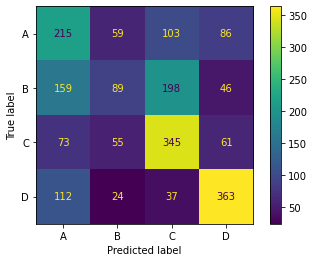

In [67]:
default_log_model = LogisticRegression()
print("Default Log Model:\n")
val1 = train_test_model(default_log_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

Default KNN Model:

Time taken:  0.005982637405395508
Test size: 2025
Total Accuracy:  0.4918518518518519
Classification Report:

              precision    recall  f1-score   support

           A       0.37      0.47      0.41       463
           B       0.39      0.38      0.38       492
           C       0.56      0.49      0.52       534
           D       0.67      0.62      0.64       536

    accuracy                           0.49      2025
   macro avg       0.50      0.49      0.49      2025
weighted avg       0.50      0.49      0.50      2025

Confusion Matrix:



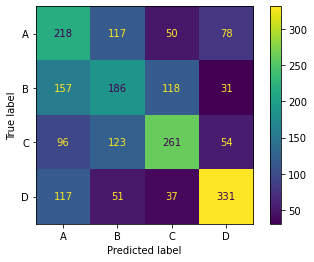

In [69]:
default_KNN_model = KNeighborsClassifier()
print("Default KNN Model:\n")
val2 = train_test_model(default_KNN_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [70]:
from sklearn.tree import DecisionTreeClassifier

Default Decision Tree Model:

Time taken:  0.03291177749633789
Test size: 2025
Total Accuracy:  0.4212345679012346
Classification Report:

              precision    recall  f1-score   support

           A       0.30      0.32      0.31       463
           B       0.31      0.32      0.32       492
           C       0.45      0.44      0.45       534
           D       0.62      0.58      0.60       536

    accuracy                           0.42      2025
   macro avg       0.42      0.42      0.42      2025
weighted avg       0.43      0.42      0.42      2025

Confusion Matrix:



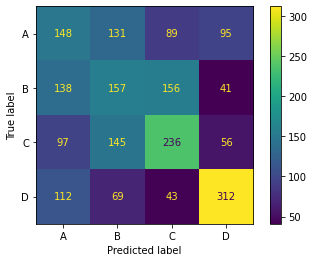

Feature Importances:
 [0.35573349 0.1618772  0.0605233  0.10969425 0.04544173 0.02134996
 0.03981942 0.0193609  0.01267195 0.01648831 0.0115472  0.01631716
 0.00857637 0.00708792 0.01163188 0.00795028 0.01280904 0.01628125
 0.01756203 0.00499173 0.03438132 0.0079033 ]


In [71]:
default_decision_tree = DecisionTreeClassifier()
print("Default Decision Tree Model:\n")
val3 = train_test_model(default_decision_tree,scaled_X_train,y_train,scaled_X_val,y_val)
print('Feature Importances:\n',default_decision_tree.feature_importances_)

In [72]:
from sklearn.ensemble import RandomForestClassifier

Default Random Forest Model:

Time taken:  0.6133880615234375
Test size: 2025
Total Accuracy:  0.4804938271604938
Classification Report:

              precision    recall  f1-score   support

           A       0.37      0.39      0.38       463
           B       0.36      0.31      0.34       492
           C       0.53      0.52      0.53       534
           D       0.61      0.67      0.64       536

    accuracy                           0.48      2025
   macro avg       0.47      0.47      0.47      2025
weighted avg       0.47      0.48      0.48      2025

Confusion Matrix:



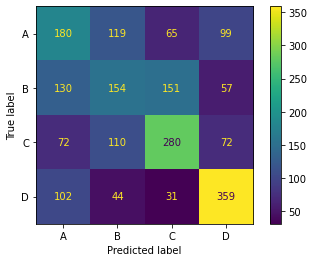

Feature Importances:
 [0.34625438 0.15129262 0.05708983 0.11497772 0.03845737 0.03310847
 0.04041336 0.0188902  0.01802975 0.02115649 0.0115316  0.03639926
 0.01010791 0.00991249 0.01268322 0.00656265 0.01087946 0.0140967
 0.01547623 0.00373722 0.02151201 0.00743106]


In [73]:
default_random_forest = RandomForestClassifier()
print("Default Random Forest Model:\n")
val4 = train_test_model(default_random_forest,scaled_X_train,y_train,scaled_X_val,y_val)
print('Feature Importances:\n',default_random_forest.feature_importances_)

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

Cross validated Log Model:

Time taken:  217.79799389839172
Test size: 2025
Total Accuracy:  0.4997530864197531
Classification Report:

              precision    recall  f1-score   support

           A       0.38      0.46      0.42       463
           B       0.39      0.18      0.25       492
           C       0.51      0.65      0.57       534
           D       0.65      0.68      0.66       536

    accuracy                           0.50      2025
   macro avg       0.48      0.49      0.48      2025
weighted avg       0.49      0.50      0.48      2025

Confusion Matrix:



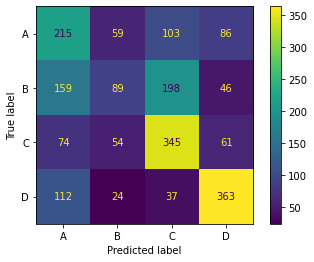

In [76]:
base_log_model = LogisticRegression(solver='saga',penalty='elasticnet',max_iter = 1000)
param_grid = {
    'l1_ratio':np.linspace(0,1,10),
    'C':np.logspace(0,10,10)
}
grid_model = GridSearchCV(base_log_model,param_grid)
print("Cross validated Log Model:\n")
val5 = train_test_model(grid_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [77]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.5555555555555556}

In [78]:
from sklearn.svm import SVC

SVM(with CV): 

Time taken:  49.74652051925659
Test size: 2025
Total Accuracy:  0.5130864197530864
Classification Report:

              precision    recall  f1-score   support

           A       0.40      0.46      0.43       463
           B       0.38      0.33      0.35       492
           C       0.59      0.55      0.57       534
           D       0.65      0.69      0.67       536

    accuracy                           0.51      2025
   macro avg       0.51      0.51      0.51      2025
weighted avg       0.51      0.51      0.51      2025

Confusion Matrix:



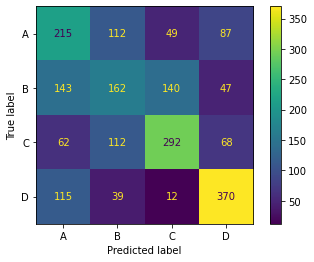

In [79]:
base_svc = SVC(kernel = 'rbf')
param_grid = {
    'C':[0.01,0.1,1,10,100]
}
grid_model_2 = GridSearchCV(base_svc,param_grid)
print('SVM(with CV): \n')
val6 = train_test_model(grid_model_2,scaled_X_train,y_train,scaled_X_val,y_val)


In [80]:
grid_model_2.best_params_

{'C': 1}

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting: 

Time taken:  199.08891534805298
Test size: 2025
Total Accuracy:  0.5204938271604939
Classification Report:

              precision    recall  f1-score   support

           A       0.41      0.48      0.44       463
           B       0.40      0.31      0.35       492
           C       0.58      0.58      0.58       534
           D       0.64      0.69      0.67       536

    accuracy                           0.52      2025
   macro avg       0.51      0.51      0.51      2025
weighted avg       0.52      0.52      0.52      2025

Confusion Matrix:



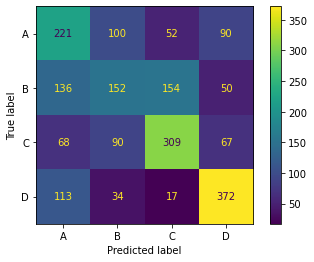

In [82]:
gb_model = GradientBoostingClassifier()
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.05,0.1,0.2],
    'max_depth':[3,4,5]
}
grid_model_3 = GridSearchCV(gb_model,param_grid)
print('Gradient Boosting: \n')
val7 = train_test_model(grid_model_3,scaled_X_train,y_train,scaled_X_val,y_val)


In [83]:
grid_model_3.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [85]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoosting: 

Time taken:  19.500797986984253
Test size: 2025
Total Accuracy:  0.5106172839506172
Classification Report:

              precision    recall  f1-score   support

           A       0.40      0.53      0.45       463
           B       0.42      0.23      0.30       492
           C       0.51      0.63      0.56       534
           D       0.69      0.64      0.66       536

    accuracy                           0.51      2025
   macro avg       0.51      0.51      0.50      2025
weighted avg       0.51      0.51      0.50      2025

Confusion Matrix:



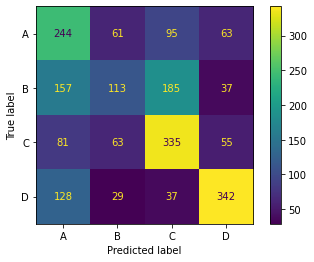

In [86]:
ada_model = AdaBoostClassifier()
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.05,0.1,0.2]
}
grid_model_4 = GridSearchCV(ada_model,param_grid)
print('AdaBoosting: \n')
val8 = train_test_model(grid_model_4,scaled_X_train,y_train,scaled_X_val,y_val)


In [87]:
grid_model_4.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [88]:
out = pd.DataFrame([val1,val2,val3,val4,val5,val6,val7,val8],
                   index = ['Logistic','KNN','Decision Tree','Random Forest','Logistic CV','SVM CV','Gradient Boosting','AdaBoosting'],
                  columns=['Time','Accuracy'])

out.sort_values('Time')

,Time,Accuracy
KNN,0.005983,0.491852
Decision Tree,0.032912,0.421235
Logistic,0.106244,0.499753
Random Forest,0.613388,0.480494
AdaBoosting,19.500798,0.510617
SVM CV,49.746521,0.513086
Gradient Boosting,199.088915,0.520494
Logistic CV,217.797994,0.499753


In [89]:
#Choose SVM CV
final_predictions = grid_model_2.predict(scaled_X_test)

In [90]:
final_predictions

array(['A', 'D', 'D', ..., 'A', 'B', 'D'], dtype=object)